In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

### The Big Picture

##### After conducting an analysis of the available features in the dataset, it was discovered that the concept of lsoa holds a lot of potential. In essence, the lsoa are a geographical hierarchy that divide England and Whales into areas of similar populations. This is particularly interesting since these areas are then statistically studied across various indices of deprivation. These deprivation indices include metrics such as income, employment, and education. After carefully considering all the statistics reported on the LSOA, it was decided to use education deprivation as our metric of interest. This decision was based on the fact that education can play a major role in individuals' behavioural patterns. The natural consequent question would be **"does lower education result in more dangerous driving?"**


In [2]:
df_lsao = pd.read_csv('imd_eng.csv',encoding= 'unicode_escape')
df_lsao.head()


lsoacode          laname gorname  imd_score  imd_rank  income_score  \
0  E01000001  City of London  London       6.16     28814          0.01   
1  E01000002  City of London  London       5.59     29450          0.01   
2  E01000003  City of London  London      13.29     20047          0.07   
3  E01000004  City of London  London      11.17     22503          0.04   
4  E01000005  City of London  London      21.36     12978          0.16   

   income_rank  employ_score  employ_rank  healthdd_score  healthdd_rank  \
0        32460          0.01        32435           -2.11          32332   
1        32457          0.01        32452           -2.78          32472   
2        22562          0.05        26026           -0.97          28188   
3        30002          0.04        28814           -1.04          28814   
4        11341          0.07        19427            0.07          14900   

   edust_score  edust_rank  housesb_score  housesb_rank  crimed_score  \
0         0.21       32421          32.60          5491         -1.64   
1         0.26       32392          30.26          6980         -1.93   
2         7.16       24611          40.32          2211         -1.21   
3         1.76       30899          37.92          3012         -1.32   
4        20.24       13235          34.66          4407         -1.02   

   crimed_rank  environl_score  environl_rank  
0        31816           26.28          10212  
1        32269           25.73          10483  
2        30147           36.48           6088  
3        30744           46.72           3257  
4        28792           40.94           4730

In [3]:
df_lsao['edust_score'].describe()

count    32482.000000
mean        21.691128
std         18.811545
min          0.010000
25%          7.360000
50%         16.055000
75%         30.587500
max         99.340000
Name: edust_score, dtype: float64

In [4]:
df_lsao['edust_rank'].describe()


count    32482.000000
mean     16241.499538
std       9376.890108
min          1.000000
25%       8121.250000
50%      16241.500000
75%      24361.750000
max      32482.000000
Name: edust_rank, dtype: float64

In [5]:
df_lsao.shape

(32482, 19)

 #### An area's rank of Education Skills And Training Score is determined by taking into account both its performance (score) and how it stacks up against other locations throughout the country. According to the current ranking system, 1 represents the most deprived person, while 32,844 represents the least deprived person.

In [6]:
df_lsao['edust_rank'].isnull().mean()*100

0.0

In [7]:
df_lsao = df_lsao[['lsoacode','edust_rank']]
df_lsao['lsoacode'] = df_lsao['lsoacode'].astype(str)
df_lsao.head()

lsoacode  edust_rank
0  E01000001       32421
1  E01000002       32392
2  E01000003       24611
3  E01000004       30899
4  E01000005       13235

In [8]:
df_lsao.shape

(32482, 2)

In [9]:
df_lsao_wales = pd.read_csv('WIMD_Ranks.csv')
df_lsao_wales = df_lsao_wales[['Local Area (2011 LSOA)','Education']]
df_lsao_wales.rename(columns = {'Local Area (2011 LSOA)':'lsoacode','Education':'edust_rank'}, inplace = True)
df_lsao_wales.head()

lsoacode  edust_rank
0  W01000001        1057
1  W01000002        1591
2  W01000003         615
3  W01000004         787
4  W01000005         336

In [10]:
df_lsao.shape,df_lsao_wales.shape

((32482, 2), (1909, 2))

In [11]:
df_lsao = pd.concat([df_lsao,df_lsao_wales],axis=0)
df_lsao.head()

lsoacode  edust_rank
0  E01000001       32421
1  E01000002       32392
2  E01000003       24611
3  E01000004       30899
4  E01000005       13235

In [12]:
df_lsao.shape

(34391, 2)

In [13]:
def reverse_encode(df,column_name,look_up_table_df):
    df_look_table_column = look_up_table_df[look_up_table_df['column_name']==column_name]
    df_look_table_column.drop('column_name',axis =1,inplace=True)
    mapping_dict = dict()
    for index,row in df_look_table_column.iterrows():
        mapping_dict[row['Encoding']] = row['Value']
    print(df[column_name].replace(mapping_dict))
    df[column_name] = df[column_name].replace(mapping_dict)
    

In [14]:
df_look_up = pd.read_csv('look_up_table.csv')
df_look_up_lsoa = df_look_up[df_look_up['column_name']=='lsoa_of_accident_location']
df_look_up_lsoa.drop('column_name',axis =1,inplace=True)
df_look_up_lsoa['Value'] = df_look_up_lsoa['Value'].astype(str)
df_look_up_lsoa.head()

C:\Users\micoa\AppData\Local\Temp\ipykernel_21396\1564024222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_look_up_lsoa.drop('column_name',axis =1,inplace=True)
C:\Users\micoa\AppData\Local\Temp\ipykernel_21396\1564024222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_look_up_lsoa['Value'] = df_look_up_lsoa['Value'].astype(str)


Value  Encoding
701  E01000001         0
702  E01000002         1
703  E01000004         2
704  E01000005         3
705  E01000006         4

In [15]:
mapping_dict = dict()
for index,row in df_look_up_lsoa.iterrows():
    mapping_dict[row['Value']] = row['Encoding']
mapping_dict

{'E01000001': 0,
 'E01000002': 1,
 'E01000004': 2,
 'E01000005': 3,
 'E01000006': 4,
 'E01000007': 5,
 'E01000008': 6,
 'E01000009': 7,
 'E01000010': 8,
 'E01000011': 9,
 'E01000013': 10,
 'E01000014': 11,
 'E01000015': 12,
 'E01000016': 13,
 'E01000017': 14,
 'E01000018': 15,
 'E01000019': 16,
 'E01000020': 17,
 'E01000021': 18,
 'E01000022': 19,
 'E01000023': 20,
 'E01000024': 21,
 'E01000026': 22,
 'E01000027': 23,
 'E01000029': 24,
 'E01000030': 25,
 'E01000031': 26,
 'E01000032': 27,
 'E01000033': 28,
 'E01000034': 29,
 'E01000035': 30,
 'E01000036': 31,
 'E01000037': 32,
 'E01000038': 33,
 'E01000039': 34,
 'E01000041': 35,
 'E01000042': 36,
 'E01000043': 37,
 'E01000044': 38,
 'E01000045': 39,
 'E01000046': 40,
 'E01000047': 41,
 'E01000048': 42,
 'E01000049': 43,
 'E01000050': 44,
 'E01000051': 45,
 'E01000052': 46,
 'E01000053': 47,
 'E01000055': 48,
 'E01000056': 49,
 'E01000057': 50,
 'E01000058': 51,
 'E01000059': 52,
 'E01000060': 53,
 'E01000061': 54,
 'E01000062': 55,
 '

In [16]:
len(set(df_look_up_lsoa['Value']).difference(set(df_lsao['lsoacode'])))

42

## After retrieving all LSOA data available for both England and Wales, we still have 42 LSOA values whose data is not available.

In [17]:
set(df_look_up_lsoa['Value']).difference(set(df_lsao['lsoacode']))

{'W01000045',
 'W01000046',
 'W01000055',
 'W01000058',
 'W01000120',
 'W01000160',
 'W01000161',
 'W01000357',
 'W01000421',
 'W01000435',
 'W01000436',
 'W01000437',
 'W01000462',
 'W01000463',
 'W01000468',
 'W01000469',
 'W01000491',
 'W01000495',
 'W01000514',
 'W01000520',
 'W01000521',
 'W01000526',
 'W01000530',
 'W01000661',
 'W01000668',
 'W01000669',
 'W01000743',
 'W01000748',
 'W01000972',
 'W01000988',
 'W01001074',
 'W01001163',
 'W01001254',
 'W01001323',
 'W01001550',
 'W01001656',
 'W01001700',
 'W01001701',
 'W01001723',
 'W01001763',
 'W01001801',
 'W01001845'}

In [18]:
df_look_up_lsoa[df_look_up_lsoa['Value'] == 'E01022070']['Value']

19411    E01022070
Name: Value, dtype: object

In [19]:
set(df_look_up_lsoa['Value'])
    

{'E01016821',
 'E01012230',
 'E01016291',
 'E01013282',
 'E01017729',
 'E01004534',
 'E01023863',
 'E01024012',
 'E01015823',
 'E01023905',
 'E01021701',
 'E01023879',
 'E01010145',
 'E01000017',
 'E01018041',
 'E01015836',
 'E01031627',
 'E01027713',
 'E01003902',
 'E01010149',
 'E01007801',
 'E01020419',
 'E01003885',
 'E01006907',
 'E01029721',
 'E01030021',
 'E01007822',
 'E01010114',
 'E01026800',
 'E01028781',
 'E01005735',
 'E01016299',
 'E01015801',
 'E01021860',
 'E01029977',
 'E01014197',
 'E01009311',
 'E01002566',
 'E01023007',
 'E01004458',
 'E01000236',
 'W01000579',
 'E01015004',
 'E01012513',
 'E01027843',
 'E01027474',
 'E01000214',
 'E01014367',
 'E01004110',
 'E01008556',
 'E01011669',
 'E01028639',
 'E01032234',
 'E01002703',
 'E01010855',
 'E01021305',
 'E01028778',
 'E01025401',
 'E01020795',
 'E01000142',
 'E01012200',
 'E01014779',
 'E01005612',
 'W01000685',
 'E01002293',
 'E01031925',
 'W01001242',
 'E01017457',
 'E01021748',
 'E01028022',
 'E01016344',
 'E010

In [20]:
len(df_look_up_lsoa['Value'].unique())

29158

In [21]:
len(df_lsao['lsoacode'].unique())

34391

In [22]:
lsao_values = df_look_up_lsoa['Value'].unique()
df_lsao = df_lsao[df_lsao['lsoacode'].isin(lsao_values)]
df_lsao.rename(columns = {'edust_rank':'Education_Deprivation_Score'}, inplace = True)
df_lsao['lsoa_of_accident_location'] = df_lsao["lsoacode"].replace(mapping_dict)
df_education_index = df_lsao.drop('lsoacode',axis =1)
df_education_index.head()

Education_Deprivation_Score  lsoa_of_accident_location
0                        32421                          0
1                        32392                          1
3                        30899                          2
4                        13235                          3
5                        18084                          4

In [23]:
df_accidents = pd.read_csv('Final_Output.csv')
df_accidents.head()

longitude   latitude  police_force  accident_severity  number_of_vehicles  \
0  -0.192203  51.495766            29                  1                   1   
1  -0.165408  51.495710            29                  2                   2   
2  -0.170401  51.489763            29                  1                   1   
3  -0.194856  51.497875            29                  1                   2   
4  -0.182783  51.482671            29                  1                   2   

   number_of_casualties  local_authority_district  \
0                     1                       166   
1                     1                       166   
2                     1                       166   
3                     3                       166   
4                     1                       166   

   local_authority_ons_district  local_authority_highway  first_road_number  \
0                           168                       89                  0   
1                           168                       89                  0   
2                           168                       89                304   
3                           168                       89                  0   
4                           168                       89               3220   

   speed_limit  second_road_number  is_Urban  \
0            1                   0         1   
1            1                   0         1   
2            1                  -1         1   
3            1                   0         1   
4            1                  -1         1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                            1                0   
1                                            1                0   
2                                            1                0   
3                                            1                0   
4                                            0                0   

   lsoa_of_accident_location  Week number  first_road_class_A  \
0                       2426            2                   0   
1                       2433           44                   0   
2                       2522            3                   0   
3                       2427            4                   0   
4                       2521           22                   1   

   first_road_class_A(M)  first_road_class_B  first_road_class_C  \
0                      0                   0                   1   
1                      0                   0                   1   
2                      0                   1                   0   
3                      0                   0                   0   
4                      0                   0                   0   

   first_road_class_Motorway  second_road_class_A  second_road_class_A(M)  \
0                          0                    0                       0   
1                          0                    0                       0   
2                          0                    0                       0   
3                          0                    0                       0   
4                          0                    0                       0   

   second_road_class_B  second_road_class_C  second_road_class_Motorway  \
0                    0                    0                           0   
1                    0                    0                           0   
2                    0                    0                           0   
3                    0                    0                           0   
4                    0                    0                           0   

   second_road_class_Unclassified  day_of_week_Monday  day_of_week_Saturday  \
0                               1                   0                     0   
1                               1                   0                     0   
2                               0                   0                     0   
3     

### As discussed above, we have 42 LSOA values not available to us in the public datasets we were able to retrieve, this leads to 328 rows having missing values for the newly added column. since the rows with missing values acount for less than 1% of the dataset, we will opt to remove these rows. This will automatically be done by using inner join.

In [24]:
df_accidents_augmented =df_accidents.merge(df_education_index,how ='inner')

In [25]:
df_accidents_augmented.shape,df_accidents.shape

((148937, 90), (149265, 89))

In [46]:
df_accidents_augmented.shape[0]-df_accidents.shape[0]

-328

In [26]:
df_accidents_augmented.isnull().mean()*100

longitude                      0.0
latitude                       0.0
police_force                   0.0
accident_severity              0.0
number_of_vehicles             0.0
                              ... 
Month                          0.0
Day                            0.0
Hour                           0.0
Minutes                        0.0
Education_Deprivation_Score    0.0
Length: 90, dtype: float64

In [27]:
df_accidents_augmented.head()

longitude   latitude  police_force  accident_severity  number_of_vehicles  \
0  -0.192203  51.495766            29                  1                   1   
1  -0.165408  51.495710            29                  2                   2   
2  -0.163669  51.499549            29                  1                   1   
3  -0.164551  51.499113            29                  1                   2   
4  -0.167355  51.497449            29                  1                   2   

   number_of_casualties  local_authority_district  \
0                     1                       166   
1                     1                       166   
2                     1                       166   
3                     1                       166   
4                     1                       166   

   local_authority_ons_district  local_authority_highway  first_road_number  \
0                           168                       89                  0   
1                           168                       89                  0   
2                           168                       89                  4   
3                           168                       89                  4   
4                           168                       89                  4   

   speed_limit  second_road_number  is_Urban  \
0            1                   0         1   
1            1                   0         1   
2            1                  -1         1   
3            1                   0         1   
4            1                   0         1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                            1                0   
1                                            1                0   
2                                            1                0   
3                                            1                0   
4                                            1                0   

   lsoa_of_accident_location  Week number  first_road_class_A  \
0                       2426            2                   0   
1                       2433           44                   0   
2                       2433           26                   1   
3                       2433           12                   1   
4                       2433           13                   1   

   first_road_class_A(M)  first_road_class_B  first_road_class_C  \
0                      0                   0                   1   
1                      0                   0                   1   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   

   first_road_class_Motorway  second_road_class_A  second_road_class_A(M)  \
0                          0                    0                       0   
1                          0                    0                       0   
2                          0                    0                       0   
3                          0                    0                       0   
4                          0                    0                       0   

   second_road_class_B  second_road_class_C  second_road_class_Motorway  \
0                    0                    0                           0   
1                    0                    0                           0   
2                    0                    0                           0   
3                    0                    0                           0   
4                    0                    0                           0   

   second_road_class_Unclassified  day_of_week_Monday  day_of_week_Saturday  \
0                               1                   0                     0   
1                               1                   0                     0   
2                               0                   0                     0   
3     

In [28]:

df_accidents_augmented['Education_level'] = pd.cut(df_accidents_augmented['Education_Deprivation_Score'], 4,\
                            labels = ['Highly Deprived','Deprived','Educated','Highly Educated'])    

df_accidents_augmented.head()


longitude   latitude  police_force  accident_severity  number_of_vehicles  \
0  -0.192203  51.495766            29                  1                   1   
1  -0.165408  51.495710            29                  2                   2   
2  -0.163669  51.499549            29                  1                   1   
3  -0.164551  51.499113            29                  1                   2   
4  -0.167355  51.497449            29                  1                   2   

   number_of_casualties  local_authority_district  \
0                     1                       166   
1                     1                       166   
2                     1                       166   
3                     1                       166   
4                     1                       166   

   local_authority_ons_district  local_authority_highway  first_road_number  \
0                           168                       89                  0   
1                           168                       89                  0   
2                           168                       89                  4   
3                           168                       89                  4   
4                           168                       89                  4   

   speed_limit  second_road_number  is_Urban  \
0            1                   0         1   
1            1                   0         1   
2            1                  -1         1   
3            1                   0         1   
4            1                   0         1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                            1                0   
1                                            1                0   
2                                            1                0   
3                                            1                0   
4                                            1                0   

   lsoa_of_accident_location  Week number  first_road_class_A  \
0                       2426            2                   0   
1                       2433           44                   0   
2                       2433           26                   1   
3                       2433           12                   1   
4                       2433           13                   1   

   first_road_class_A(M)  first_road_class_B  first_road_class_C  \
0                      0                   0                   1   
1                      0                   0                   1   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   

   first_road_class_Motorway  second_road_class_A  second_road_class_A(M)  \
0                          0                    0                       0   
1                          0                    0                       0   
2                          0                    0                       0   
3                          0                    0                       0   
4                          0                    0                       0   

   second_road_class_B  second_road_class_C  second_road_class_Motorway  \
0                    0                    0                           0   
1                    0                    0                           0   
2                    0                    0                           0   
3                    0                    0                           0   
4                    0                    0                           0   

   second_road_class_Unclassified  day_of_week_Monday  day_of_week_Saturday  \
0                               1                   0                     0   
1                               1                   0                     0   
2                               0                   0                     0   
3     

In [29]:
df_accidents_augmented_analysis = df_accidents_augmented.copy()

In [30]:
reverse_encode(df_accidents_augmented_analysis,'accident_severity',df_look_up)

0          Slight
1         Serious
2          Slight
3          Slight
4          Slight
           ...   
148932     Slight
148933     Slight
148934     Slight
148935     Slight
148936     Slight
Name: accident_severity, Length: 148937, dtype: object


C:\Users\micoa\AppData\Local\Temp\ipykernel_21396\2514376080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_look_table_column.drop('column_name',axis =1,inplace=True)


In [31]:
df_accidents_augmented_analysis.head()

longitude   latitude  police_force accident_severity  number_of_vehicles  \
0  -0.192203  51.495766            29            Slight                   1   
1  -0.165408  51.495710            29           Serious                   2   
2  -0.163669  51.499549            29            Slight                   1   
3  -0.164551  51.499113            29            Slight                   2   
4  -0.167355  51.497449            29            Slight                   2   

   number_of_casualties  local_authority_district  \
0                     1                       166   
1                     1                       166   
2                     1                       166   
3                     1                       166   
4                     1                       166   

   local_authority_ons_district  local_authority_highway  first_road_number  \
0                           168                       89                  0   
1                           168                       89                  0   
2                           168                       89                  4   
3                           168                       89                  4   
4                           168                       89                  4   

   speed_limit  second_road_number  is_Urban  \
0            1                   0         1   
1            1                   0         1   
2            1                  -1         1   
3            1                   0         1   
4            1                   0         1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                            1                0   
1                                            1                0   
2                                            1                0   
3                                            1                0   
4                                            1                0   

   lsoa_of_accident_location  Week number  first_road_class_A  \
0                       2426            2                   0   
1                       2433           44                   0   
2                       2433           26                   1   
3                       2433           12                   1   
4                       2433           13                   1   

   first_road_class_A(M)  first_road_class_B  first_road_class_C  \
0                      0                   0                   1   
1                      0                   0                   1   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   

   first_road_class_Motorway  second_road_class_A  second_road_class_A(M)  \
0                          0                    0                       0   
1                          0                    0                       0   
2                          0                    0                       0   
3                          0                    0                       0   
4                          0                    0                       0   

   second_road_class_B  second_road_class_C  second_road_class_Motorway  \
0                    0                    0                           0   
1                    0                    0                           0   
2                    0                    0                           0   
3                    0                    0                           0   
4                    0                    0                           0   

   second_road_class_Unclassified  day_of_week_Monday  day_of_week_Saturday  \
0                               1                   0                     0   
1                               1                   0                     0   
2                               0                   0                     0   
3           

## does education level affect accident severity?

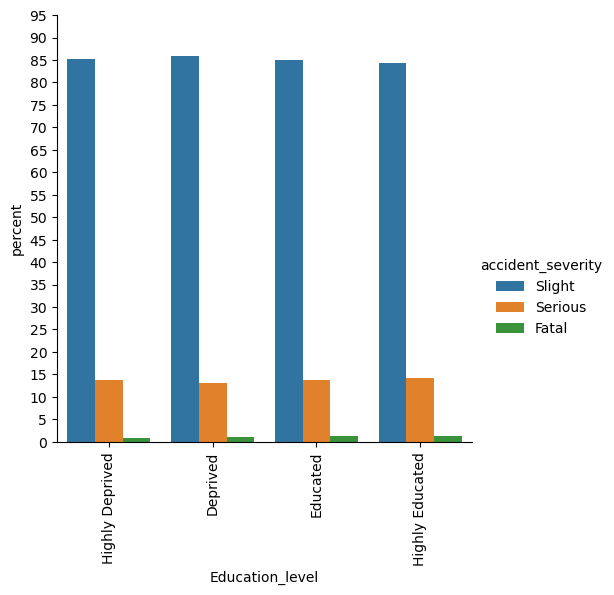

In [32]:
x,y = 'Education_level', 'accident_severity'

ax =(df_accidents_augmented_analysis
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))
plt.xticks(rotation = 90)
plt.yticks(np.arange(0, 100, 5.0))
plt.show()

In [33]:
df_accidents_augmented_analysis.groupby(x)[y].value_counts(normalize=True).mul(100)

Education_level  accident_severity
Highly Deprived  Slight               85.294349
                 Serious              13.807816
                 Fatal                 0.897835
Deprived         Slight               85.814083
                 Serious              13.141834
                 Fatal                 1.044084
Educated         Slight               84.909759
                 Serious              13.797906
                 Fatal                 1.292335
Highly Educated  Slight               84.373756
                 Serious              14.298709
                 Fatal                 1.327534
Name: accident_severity, dtype: float64

<AxesSubplot:>

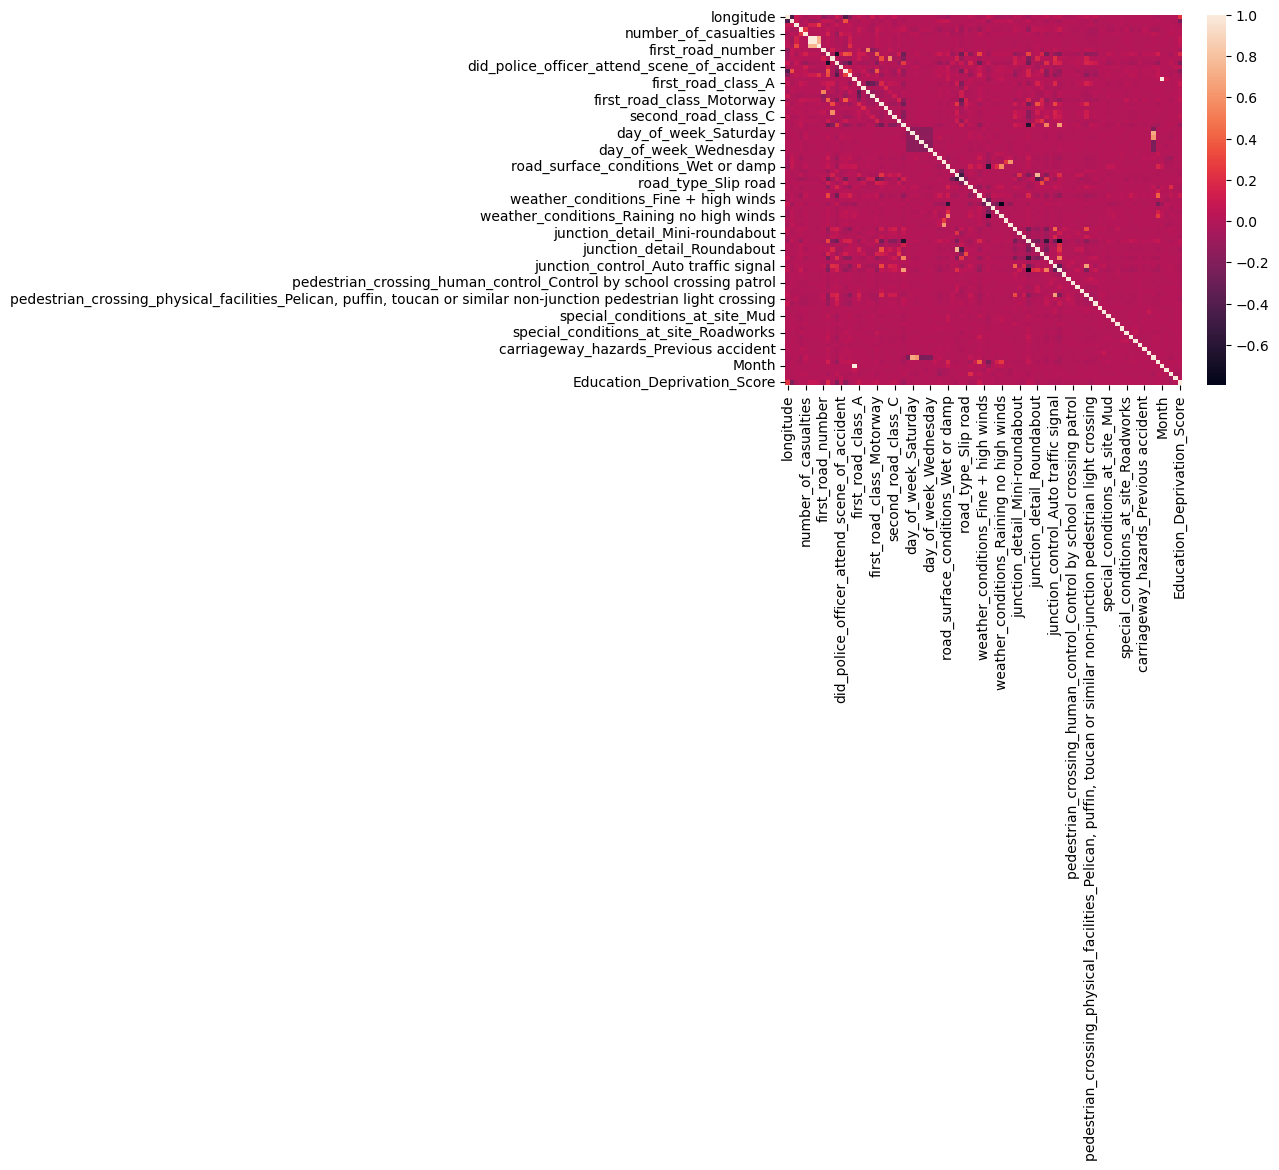

In [34]:
sns.heatmap(df_accidents_augmented_analysis.corr())


## does less education lead to more casualties?

<AxesSubplot:xlabel='Education_level', ylabel='number_of_casualties'>

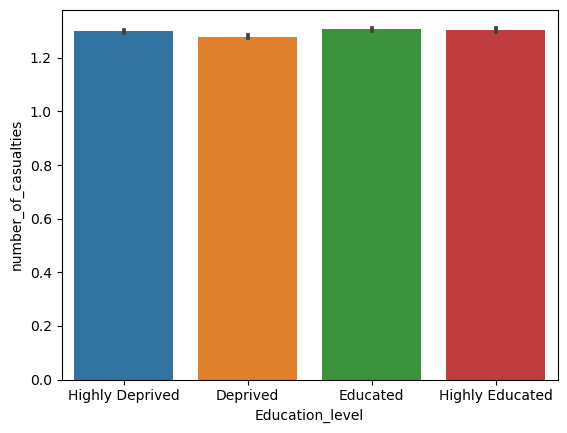

In [35]:
x,y = 'Education_level', 'number_of_casualties'

sns.barplot(data=df_accidents_augmented_analysis, x=x, y=y)

In [36]:
df_accidents_augmented_analysis.groupby(x)[y].mean()

Education_level
Highly Deprived    1.299244
Deprived           1.279154
Educated           1.306233
Highly Educated    1.304452
Name: number_of_casualties, dtype: float64

## After analyzing the data from both questions, it was discovered that the education level for each LSOA, does not have a significant impact on either accident severity or number of casualties.


## scaling the new column

<AxesSubplot:xlabel='Education_Deprivation_Score', ylabel='Density'>

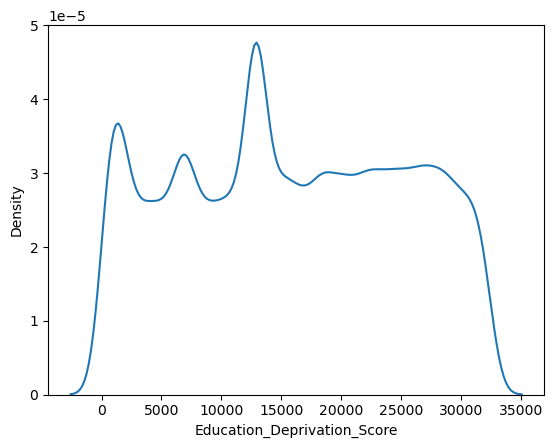

In [37]:
sns.kdeplot(df_accidents_augmented['Education_Deprivation_Score'])

In [38]:
df_accidents_augmented['Education_Deprivation_Score'].skew()


0.010777032576845728

## Feature Scaling 

In [39]:
# For min_max scaling
from sklearn.preprocessing import MinMaxScaler
education_score_scaled = MinMaxScaler().fit_transform(df_accidents_augmented[['Education_Deprivation_Score']]) 
df_accidents_augmented['Education_Deprivation_Score'] = education_score_scaled

In [40]:
df_accidents_augmented.head()

longitude   latitude  police_force  accident_severity  number_of_vehicles  \
0  -0.192203  51.495766            29                  1                   1   
1  -0.165408  51.495710            29                  2                   2   
2  -0.163669  51.499549            29                  1                   1   
3  -0.164551  51.499113            29                  1                   2   
4  -0.167355  51.497449            29                  1                   2   

   number_of_casualties  local_authority_district  \
0                     1                       166   
1                     1                       166   
2                     1                       166   
3                     1                       166   
4                     1                       166   

   local_authority_ons_district  local_authority_highway  first_road_number  \
0                           168                       89                  0   
1                           168                       89                  0   
2                           168                       89                  4   
3                           168                       89                  4   
4                           168                       89                  4   

   speed_limit  second_road_number  is_Urban  \
0            1                   0         1   
1            1                   0         1   
2            1                  -1         1   
3            1                   0         1   
4            1                   0         1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                            1                0   
1                                            1                0   
2                                            1                0   
3                                            1                0   
4                                            1                0   

   lsoa_of_accident_location  Week number  first_road_class_A  \
0                       2426            2                   0   
1                       2433           44                   0   
2                       2433           26                   1   
3                       2433           12                   1   
4                       2433           13                   1   

   first_road_class_A(M)  first_road_class_B  first_road_class_C  \
0                      0                   0                   1   
1                      0                   0                   1   
2                      0                   0                   0   
3                      0                   0                   0   
4                      0                   0                   0   

   first_road_class_Motorway  second_road_class_A  second_road_class_A(M)  \
0                          0                    0                       0   
1                          0                    0                       0   
2                          0                    0                       0   
3                          0                    0                       0   
4                          0                    0                       0   

   second_road_class_B  second_road_class_C  second_road_class_Motorway  \
0                    0                    0                           0   
1                    0                    0                           0   
2                    0                    0                           0   
3                    0                    0                           0   
4                    0                    0                           0   

   second_road_class_Unclassified  day_of_week_Monday  day_of_week_Saturday  \
0                               1                   0                     0   
1                               1                   0                     0   
2                               0                   0                     0   
3     

In [41]:
df_accidents_augmented.Education_level.unique()

['Highly Educated', 'Deprived', 'Educated', 'Highly Deprived']
Categories (4, object): ['Highly Deprived' < 'Deprived' < 'Educated' < 'Highly Educated']

In [42]:
df_accidents_augmented.Education_level.isnull().mean()*100

0.0

In [43]:
def LabelEncode(dataframe,column_name,mapping={}):
    le_namemapping ={}
    look_up = {}
    df = dataframe.copy()
    if(len(mapping)!=0):
        df[column_name] = df[column_name].map(mapping)
        look_up = {
            'column_name': column_name,
            'Value': mapping.keys(),
            'Encoding': mapping.values()
        }
    else:
        le = preprocessing.LabelEncoder()
        le.fit(df[column_name])
        
        le_namemapping = dict(zip(le.classes_, le.transform(le.classes_)))
        look_up = {
            'column_name': column_name,
            'Value': le.classes_ ,
            'Encoding': le.transform(le.classes_)
        }
        df[column_name] = df[column_name].map(le_namemapping)
    look_up = pd.DataFrame(look_up)
    return df,look_up  

In [44]:
mappings = {
        'Highly Deprived':1,
        'Deprived':2,
        'Educated':3,
        'Highly Educated':4
    }

df_accidents_augmented,mappings = LabelEncode(df_accidents_augmented,'Education_level',mappings)
df_accidents_augmented['Education_level'].value_counts()

2    39652
1    38203
3    35904
4    35178
Name: Education_level, dtype: int64

In [45]:
df_look_up = pd.concat([df_look_up,mappings],axis = 0)
df_look_up

column_name                    Value  Encoding
0             Week num  2011-01-01 - 2011-01-01         0
1             Week num  2011-01-02 - 2011-01-08         1
2             Week num  2011-01-09 - 2011-01-15         2
3             Week num  2011-01-16 - 2011-01-22         3
4             Week num  2011-01-23 - 2011-01-29         4
...                ...                      ...       ...
29864      speed_limit                     70.0         5
0      Education_level          Highly Deprived         1
1      Education_level                 Deprived         2
2      Education_level                 Educated         3
3      Education_level          Highly Educated         4

[29869 rows x 3 columns]

In [ ]:
df_look_up.to_csv('look_up_table.csv',index=False)